In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

data = load_digits()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [2]:
print(data.data.shape)

(1797, 64)


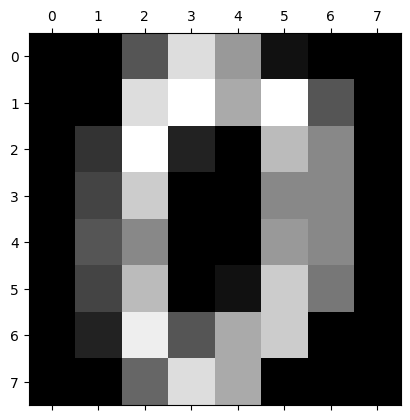

In [3]:
plt.matshow(data.images[0], cmap="gray")

plt.show()

# <u>scikit-learn</u>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Gradient Boosting model
gb_model = GradientBoostingClassifier(
    loss = 'log_loss',
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1
)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))

Gradient Boosting Accuracy: 0.95


In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Train HistGradientBoosting
hist_gb_model = HistGradientBoostingClassifier(
    max_iter=100,
    max_depth=6,
    learning_rate=0.1
)
hist_gb_model.fit(X_train, y_train)

# Evaluation
y_pred = hist_gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))

Gradient Boosting Accuracy: 0.9722222222222222


In [13]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    reg_alpha=0.1, 
    reg_lambda=1, 
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9611111111111111


## <u>Probar:</u>

- Diferentes implementaciones.
- Diferentes funciones de coste (elegir según el tipo de problema).
- Diferentes regulaciones.
- ¿Sobreajuste? Evaluando en datos que ha visto vs. datos nuevos.